In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import saraRC1 as sara

**Multi-Plot**

In [2]:
img_path = './images'
imgs = []

for root, dirs, files in os.walk(img_path):
    for file in files:
        imgs.append(cv2.cvtColor(cv2.imread(os.path.join(root, file)), cv2.COLOR_BGR2RGB))

In [3]:
seg_dim = 8
saliency_maps = {}
sara_heatmaps = {}
sara_lists = {}

--> Processing image 1 of 4 (itti) [6.25%]
--> Processing image 1 of 4 (deepgaze) [12.5%]


c:\Users\matth\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\matth\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Loaded pretrained weights for efficientnet-b5


Using cache found in C:\Users\matth/.cache\torch\hub\pytorch_vision_v0.6.0
c:\Users\matth\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet201_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet201_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Using cache found in C:\Users\matth/.cache\torch\hub\pytorch_vision_v0.6.0
c:\Users\matth\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
c:\Work\uni\Summer

--> Processing image 1 of 4 (fpn) [18.75%]


c:\Users\matth\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


--> Processing image 1 of 4 (emlnet) [25.0%]
Model loaded emlnet/backbone/res_imagenet.pth
Model loaded emlnet/backbone/res_places.pth
Loaded decoder emlnet/backbone/res_decoder.pth
--> Processing image 2 of 4 (itti) [31.25%]
--> Processing image 2 of 4 (deepgaze) [37.5%]
Loaded pretrained weights for efficientnet-b5


Using cache found in C:\Users\matth/.cache\torch\hub\pytorch_vision_v0.6.0
Using cache found in C:\Users\matth/.cache\torch\hub\pytorch_vision_v0.6.0


--> Processing image 2 of 4 (fpn) [43.75%]
--> Processing image 2 of 4 (emlnet) [50.0%]
Model loaded emlnet/backbone/res_imagenet.pth
Model loaded emlnet/backbone/res_places.pth
Loaded decoder emlnet/backbone/res_decoder.pth
--> Processing image 3 of 4 (itti) [56.25%]
--> Processing image 3 of 4 (deepgaze) [62.5%]
Loaded pretrained weights for efficientnet-b5


Using cache found in C:\Users\matth/.cache\torch\hub\pytorch_vision_v0.6.0
Using cache found in C:\Users\matth/.cache\torch\hub\pytorch_vision_v0.6.0


--> Processing image 3 of 4 (fpn) [68.75%]
--> Processing image 3 of 4 (emlnet) [75.0%]
Model loaded emlnet/backbone/res_imagenet.pth
Model loaded emlnet/backbone/res_places.pth
Loaded decoder emlnet/backbone/res_decoder.pth
--> Processing image 4 of 4 (itti) [81.25%]
--> Processing image 4 of 4 (deepgaze) [87.5%]
Loaded pretrained weights for efficientnet-b5


Using cache found in C:\Users\matth/.cache\torch\hub\pytorch_vision_v0.6.0
Using cache found in C:\Users\matth/.cache\torch\hub\pytorch_vision_v0.6.0


--> Processing image 4 of 4 (fpn) [93.75%]
--> Processing image 4 of 4 (emlnet) [100.0%]
Model loaded emlnet/backbone/res_imagenet.pth
Model loaded emlnet/backbone/res_places.pth
Loaded decoder emlnet/backbone/res_decoder.pth


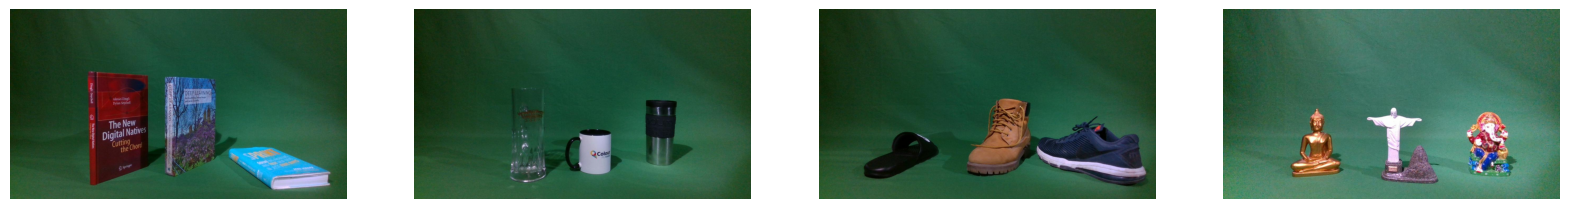

In [4]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.figure()
plt.tight_layout()

generators = ['itti', 'deepgaze', 'fpn', 'emlnet']

g = 1

for i, im in enumerate(imgs):
    if i not in saliency_maps:
        saliency_maps[i] = {}
        sara_heatmaps[i] = {}
        sara_lists[i] = {}

    for generator in generators:
        percent = round(g/(len(imgs)*len(generators))*100, 2)
        
        print(f'--> Processing image {i+1} of {len(imgs)} ({generator}) [{percent}%]')

        saliency_maps[i][generator] = sara.return_saliency(im.copy(), generator=generator)
        sara.reset()

        sara_heatmaps[i][generator], sara_lists[i][generator] = sara.return_sara(im.copy(), seg_dim, saliency_map=saliency_maps[i][generator])
        sara.reset()

        g += 1
    
    plt.subplot(1, len(imgs), i+1)
    plt.imshow(im)
    plt.axis('off')


**<h2>Spearman Correlation (Metric for Ranks)</h2>**

In [5]:
import scipy.stats as sc

ranks = {}
for i in range(len(sara_lists)):
    ranks[i] = {}

    for key, value in sara_lists[i].items():
        ranks[i][key] = [i[0] for i in value]

# print(ranks)


In [50]:
len(ranks[0]['deepgaze'])

64

In [6]:
spr = sc.spearmanr(ranks[1]["itti"], ranks[1]["deepgaze"])
print(spr)

SpearmanrResult(correlation=0.2720695970695971, pvalue=0.029640211403707786)


**<h2>Normalizing Spearman Correlation</h2>**

In [7]:
def get_norm_spr(spr_value):
    #       m - r_min
    # m -> ---------------- x (t_max - t_min) + t_min
    #       r_max - r_min
    #
    # m = measure value
    # r_min = min range of measurement
    # r_max = max range of measurement
    # t_min = min range of desired scale
    # t_max = max range of desired scale

    r_min = -1
    r_max = 1

    norm_spr = (spr_value - r_min) / (r_max - r_min)

    return norm_spr

In [8]:
norm_spr = get_norm_spr(spr.correlation)
print(norm_spr)

0.6360347985347985
